# Day 8

## part 1

- Tuning frequency represented by `a-z`, `A-Z` or `0-9`
- Antinodes are created when 2 antennas are aligned such that
    - in line with the 2 antennas
    - twice as far from one as from the other
- Antinodes can occur at points with antennae
- Find the number of unique locations where antinodes are created within the map bounds

In [11]:
import logging

from matplotlib import pyplot as plt
from tqdm import tqdm

from advent_of_code_utils.advent_of_code_utils import (
    parse_from_file, ParseConfig as PC, plot_grid, markdown
)

log = logging.getLogger('day 8')
logging.basicConfig(level=logging.INFO)

INFO:advent_of_code_utils.py:50 items loaded from "day_8.txt"


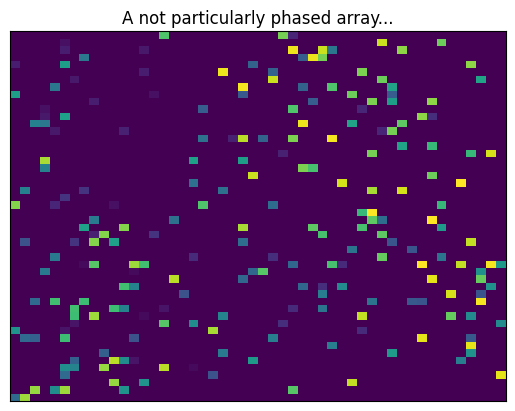

In [3]:
parser = PC('\n', PC('', str))

puzzle_grid = parse_from_file('day_8.txt', parser)

def plot_state(grid: list[list[str]], ax: plt.Axes) -> None:
    """converts the grid to plotable values and plots it"""
    temp = [[ord(char) for char in line] for line in grid]
    plot_grid(temp, ax)

fig, ax = plt.subplots()
ax.set_title('A not particularly phased array...')
plot_state(puzzle_grid, ax)

In [19]:
def get_antinodes(antennae: list[tuple[int, int]]) -> list[tuple[int, int]]:
    """
    returns the antinode locations of the antennae passed
    (assumes all same frequency)
    """
    log.debug(f'finding antinodes for {len(antennae)} antennae')
    # first get all the combinations of antenna pairs
    pairs = []
    for start, p1 in enumerate(antennae[:-1]):
        for p2 in antennae[start + 1:]:
            pairs.append((p1, p2))
    log.debug(f'created {len(pairs)} pair combinations')
    
    # now find all the locations of antinodes (including out of bounds)
    antinodes = []
    for p1, p2 in pairs:
        # find the difference
        offsets = tuple(a - b for a, b in zip(p1, p2))
        # add diff to p1
        antinodes.append(tuple(p + o for p, o in zip(p1, offsets)))
        # and subtract diff from p2
        antinodes.append(tuple(p - o for p, o in zip(p2, offsets)))
    return antinodes

def in_bounds(grid: list[list], line: int, char: int) -> bool:
    """returns true if in bounds"""
    return 0 <= line < len(grid) and 0 <= char < len(grid[0])

def find_antinodes(grid: list[list[str]]) -> set[tuple[int, int]]:
    """returns an equally sized grid with the antinode locations"""
    # first let's find all the antenna frequency locations
    frequencies = {}
    for l, line in enumerate(grid):
        for c, char in enumerate(line):
            if char == '.':
                continue
            if char not in frequencies:
                log.debug(f'added frequency: {char}')
                frequencies.update({char: []})
            point = (l, c)
            log.debug(f'{char} at {point}')
            frequencies[char].append(point)
    log.info(f'Located antennae for {len(frequencies)} frequencies')

    antinodes = []
    for freq, locations in tqdm(frequencies.items(), desc='finding antinodes'):
        # get all possible antinodes
        temp = get_antinodes(locations)
        # filter out only the ones that are in bounds
        temp = [p for p in temp if in_bounds(grid, *p)]
        # add them to the grid
        antinodes.extend(temp)

    return set(antinodes)

log.setLevel(logging.INFO)
antinodes = find_antinodes(puzzle_grid)

INFO:day 8:Located antennae for 58 frequencies
finding antinodes: 100%|██████████| 58/58 [00:00<00:00, 12964.70it/s]


In [14]:
markdown(f'The number of unique antinode locations is: {len(antinodes)}')

The number of unique antinode locations is: 361

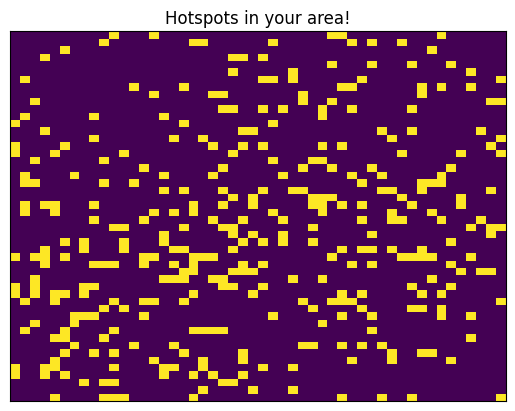

In [ ]:
antinode_grid = [['.' for _ in line] for line in puzzle_grid]
for line, char in antinodes:
    antinode_grid[line][char] = '|'  # used this as it is higher ord() than 'z'

fig, ax = plt.subplots()
ax.set_title('Hotspots in your area!')
plot_state(antinode_grid, ax)

## part 2

- Turns out instead antinodes are at any multiple of the offset, including on the antennae themselves
- time to find the rest of them!

In [21]:
def get_all_antinodes(
    antennae: list[tuple[int, int]],
    grid: list[list]
) -> set[tuple[int, int]]:
    """
    returns ALL the unique antinode locations of the antennae passed
    (assumes all same frequency)

    This time since we pass the grid the antinodes returned are all valid
    """
    log.debug(f'finding antinodes for {len(antennae)} antennae')
    # first get all the combinations of antenna pairs
    pairs = []
    for start, p1 in enumerate(antennae[:-1]):
        for p2 in antennae[start + 1:]:
            pairs.append((p1, p2))
    log.debug(f'created {len(pairs)} pair combinations')
    
    # now find all the locations of antinodes (including out of bounds)
    antinodes = []
    for p1, p2 in pairs:
        # find the difference
        offsets = tuple(a - b for a, b in zip(p1, p2))
        # going forward from p1
        point = p1
        while in_bounds(grid, *point):
            antinodes.append(point)
            point = tuple(p + o for p, o in zip(point, offsets))
        # going forward from p2
        point = p2
        while in_bounds(grid, *point):
            antinodes.append(point)
            point = tuple(p - o for p, o in zip(point, offsets))

    return set(antinodes)

def find_all_antinodes(grid: list[list[str]]) -> set[tuple[int, int]]:
    """returns an equally sized grid with the antinode locations"""
    # first let's find all the antenna frequency locations
    frequencies = {}
    for l, line in enumerate(grid):
        for c, char in enumerate(line):
            if char == '.':
                continue
            if char not in frequencies:
                log.debug(f'added frequency: {char}')
                frequencies.update({char: []})
            point = (l, c)
            log.debug(f'{char} at {point}')
            frequencies[char].append(point)
    log.info(f'Located antennae for {len(frequencies)} frequencies')

    antinodes = []
    for locations in tqdm(frequencies.values(), desc='finding antinodes'):
        # get all possible antinodes
        temp = get_all_antinodes(locations, grid)
        # add them to the grid
        antinodes.extend(temp)

    return set(antinodes)

log.setLevel(logging.INFO)
all_antinodes = find_all_antinodes(puzzle_grid)

INFO:day 8:Located antennae for 58 frequencies
finding antinodes: 100%|██████████| 58/58 [00:00<00:00, 7178.42it/s]


In [24]:
markdown(
    f'Considering all harmonics there are instead: {len(all_antinodes)} '
    'antinodes'
)

Considering all harmonics there are instead: 1249 antinodes